In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## 3. ДАННЫЕ ЕРЗ

### 3.1 ПЕРВИЧНЫЙ ПРОСМОТР

#### 3.1.1 ПРЕДОБРАБОТКА

In [ ]:
# Первичная выгрузка данных по декларациям и сохранение в .csv (MCК)
erz = pd.read_csv('zhk_save.csv')

In [ ]:
erz.rename(columns={'Unnamed: 0': 'project'}, inplace=True)

In [ ]:
erz.head()

,project,Уровень транспортной доступности,Перспективы изменения уровня транспортной доступности,Количество бесплатных общественных парковочных мест на 1 квартиру в шаговой доступности,Количество платных общественных парковочных мест на 1 квартиру в шаговой доступности,"Количество машиномест в доме, в отдельностоящем здании или на земельном участке на 1 квартиру",Лифт в паркинг,Зарядка для электромобилей,Светопрозрачные ворота,Широкий въезд в паркинг,...,Он-лайн регистрация права собственности на построенную квартиру,Он-лайн видео хода строительства на сайте или в мобильном приложении,Демонстрационные квартиры (шоу-румы),Комплексность строительства,Большинство помещений на первых этажах с выходом на улицу нежилые,Редевелопмент территории (масштабный снос существующих объектов),Сохранение объектов культурного наследия на территории ЖК,Статус большинства жилых единиц,"Средняя этажность в жилом комплексе, этажей",Доля озеленения в территории общего пользования
0,ЖК Дом А,средний\n4,есть перспективы улучшения\n3,"менее 0,1\n-0,8","более 0,7\n0,6","от 0,5 до 1\n1,5","есть\n0,3",нет\n0,"есть\n0,1","более 4 метров\n0,2",...,"есть\n0,1",нет\n0,"есть шоу-рум с отделкой, мебелью\n0,9","уплотнительная точечная застройка\n-2,6","да\n0,3",нет\n0,нет\n0,квартиры\n0,от 19 до 24\n-1,"более 40%\n1,2"
1,ЖК Квартал Издание,средний\n4,есть перспективы улучшения\n3,"от 0,1 до 0,2\n0","от 0,1 до 0,2\n0,05","от 0,2 до 0,5\n1","есть\n0,3","есть\n0,15","есть\n0,1","более 4 метров\n0,2",...,"есть\n0,1",нет\n0,"есть шоу-рум с отделкой, мебелью\n0,9",объем стройки до 50 тыс. м2\n0,"да\n0,3","нежилой застройки\n0,3",нет\n0,квартиры\n0,25 и более\n-2,"более 40%\n1,2"
2,ЖК Квартал МОНС,средний\n4,есть перспективы улучшения\n3,"от 0,1 до 0,2\n0","от 0,1 до 0,2\n0,05","более 1\n2,5","есть\n0,3",нет\n0,"есть\n0,1","более 4 метров\n0,2",...,"есть\n0,1",нет\n0,"есть шоу-рум с отделкой, мебелью\n0,9","объем стройки от 50 до 150 тыс. м2\n0,8","да\n0,3","нежилой застройки\n0,3",нет\n0,квартиры\n0,25 и более\n-2,"более 40%\n1,2"
3,ЖК Дом Лаврушинский,высокий\n7,нет\n0,"от 0,1 до 0,2\n0","от 0,3 до 0,7\n0,25","более 1\n2,5","есть\n0,3","есть\n0,15",нет\n0,"менее 3,5 метров\n0",...,нет\n0,"есть\n0,6",нет\n0,объем стройки до 50 тыс. м2\n0,"да\n0,3",нет\n0,нет\n0,квартиры\n0,от 5 до 8\n1,менее 25%\n0
4,ЖК Shagal,средний\n4,есть перспективы улучшения\n3,"от 0,1 до 0,2\n0",нет\n0,"от 0,5 до 1\n1,5","есть\n0,3","есть\n0,15",нет\n0,"менее 3,5 метров\n0",...,нет\n0,"есть\n0,6",нет\n0,объем стройки более 500 тыс. м2\n3,"да\n0,3","нежилой застройки\n0,3",нет\n0,квартиры\n0,от 19 до 24\n-1,"от 25 до 40%\n0,6"


In [ ]:
erz['project'] = erz['project'].str.replace('ЖК ', '', regex=False)

In [ ]:
erz.head()

,project,Уровень транспортной доступности,Перспективы изменения уровня транспортной доступности,Количество бесплатных общественных парковочных мест на 1 квартиру в шаговой доступности,Количество платных общественных парковочных мест на 1 квартиру в шаговой доступности,"Количество машиномест в доме, в отдельностоящем здании или на земельном участке на 1 квартиру",Лифт в паркинг,Зарядка для электромобилей,Светопрозрачные ворота,Широкий въезд в паркинг,...,Он-лайн регистрация права собственности на построенную квартиру,Он-лайн видео хода строительства на сайте или в мобильном приложении,Демонстрационные квартиры (шоу-румы),Комплексность строительства,Большинство помещений на первых этажах с выходом на улицу нежилые,Редевелопмент территории (масштабный снос существующих объектов),Сохранение объектов культурного наследия на территории ЖК,Статус большинства жилых единиц,"Средняя этажность в жилом комплексе, этажей",Доля озеленения в территории общего пользования
0,Дом А,средний\n4,есть перспективы улучшения\n3,"менее 0,1\n-0,8","более 0,7\n0,6","от 0,5 до 1\n1,5","есть\n0,3",нет\n0,"есть\n0,1","более 4 метров\n0,2",...,"есть\n0,1",нет\n0,"есть шоу-рум с отделкой, мебелью\n0,9","уплотнительная точечная застройка\n-2,6","да\n0,3",нет\n0,нет\n0,квартиры\n0,от 19 до 24\n-1,"более 40%\n1,2"
1,Квартал Издание,средний\n4,есть перспективы улучшения\n3,"от 0,1 до 0,2\n0","от 0,1 до 0,2\n0,05","от 0,2 до 0,5\n1","есть\n0,3","есть\n0,15","есть\n0,1","более 4 метров\n0,2",...,"есть\n0,1",нет\n0,"есть шоу-рум с отделкой, мебелью\n0,9",объем стройки до 50 тыс. м2\n0,"да\n0,3","нежилой застройки\n0,3",нет\n0,квартиры\n0,25 и более\n-2,"более 40%\n1,2"
2,Квартал МОНС,средний\n4,есть перспективы улучшения\n3,"от 0,1 до 0,2\n0","от 0,1 до 0,2\n0,05","более 1\n2,5","есть\n0,3",нет\n0,"есть\n0,1","более 4 метров\n0,2",...,"есть\n0,1",нет\n0,"есть шоу-рум с отделкой, мебелью\n0,9","объем стройки от 50 до 150 тыс. м2\n0,8","да\n0,3","нежилой застройки\n0,3",нет\n0,квартиры\n0,25 и более\n-2,"более 40%\n1,2"
3,Дом Лаврушинский,высокий\n7,нет\n0,"от 0,1 до 0,2\n0","от 0,3 до 0,7\n0,25","более 1\n2,5","есть\n0,3","есть\n0,15",нет\n0,"менее 3,5 метров\n0",...,нет\n0,"есть\n0,6",нет\n0,объем стройки до 50 тыс. м2\n0,"да\n0,3",нет\n0,нет\n0,квартиры\n0,от 5 до 8\n1,менее 25%\n0
4,Shagal,средний\n4,есть перспективы улучшения\n3,"от 0,1 до 0,2\n0",нет\n0,"от 0,5 до 1\n1,5","есть\n0,3","есть\n0,15",нет\n0,"менее 3,5 метров\n0",...,нет\n0,"есть\n0,6",нет\n0,объем стройки более 500 тыс. м2\n3,"да\n0,3","нежилой застройки\n0,3",нет\n0,квартиры\n0,от 19 до 24\n-1,"от 25 до 40%\n0,6"


In [ ]:
erz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Columns: 166 entries, project to Доля озеленения в территории общего пользования
dtypes: object(166)
memory usage: 1.4+ MB


## 4. Объединение данных из 3-х источников

In [ ]:
def clean_text(text):
    if pd.isna(text):
        return text
    # Приведение к нижнему регистру и удаление пунктуации
    return re.sub(r'[^\w\s]', '', str(text).lower().strip())

# Создаем копии датафреймов с очищенными полями
df1_clean = merged_df.copy()
df2_clean = erz.copy()

# Очищаем поля в обоих датафреймах
df1_clean['project_clean'] = df1_clean['project'].apply(clean_text)
df1_clean['жк_англ_clean'] = df1_clean['ЖК англ'].apply(clean_text)
df1_clean['жк_рус_clean'] = df1_clean['ЖК рус'].apply(clean_text)
df2_clean['project_clean'] = df2_clean['project'].apply(clean_text)

# Объединение по project
merged_df1 = pd.merge(
    df1_clean,
    df2_clean,
    left_on='project_clean',
    right_on='project_clean',
    how='inner'
)

# Объединение по ЖК англ
merged_df2 = pd.merge(
    df1_clean,
    df2_clean,
    left_on='жк_англ_clean',
    right_on='project_clean',
    how='inner'
)

# Объединение по ЖК рус
merged_df3 = pd.merge(
    df1_clean,
    df2_clean,
    left_on='жк_рус_clean',
    right_on='project_clean',
    how='inner'
)

# Объединяем все результаты и удаляем дубликаты
final_merged_df = pd.concat([merged_df1, merged_df2, merged_df3]).drop_duplicates()

# Удаляем временные колонки для очистки
columns_to_drop = ['project_clean', 'жк_англ_clean', 'жк_рус_clean']
final_merged_df = final_merged_df.drop(columns_to_drop, axis=1)

In [ ]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67378 entries, 0 to 31553
Columns: 229 entries, ID to project_clean_y
dtypes: datetime64[ns](4), float64(16), int64(17), object(192)
memory usage: 118.2+ MB


In [ ]:
final_merged_df.head(25)

,ID,ID ЖК,ЖК рус,ЖК англ,lat,lng,Район Город,Регион,Метро,Станция жд,...,Демонстрационные квартиры (шоу-румы),Комплексность строительства,Большинство помещений на первых этажах с выходом на улицу нежилые,Редевелопмент территории (масштабный снос существующих объектов),Сохранение объектов культурного наследия на территории ЖК,Статус большинства жилых единиц,"Средняя этажность в жилом комплексе, этажей",Доля озеленения в территории общего пользования,project_clean_x,project_clean_y
0,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


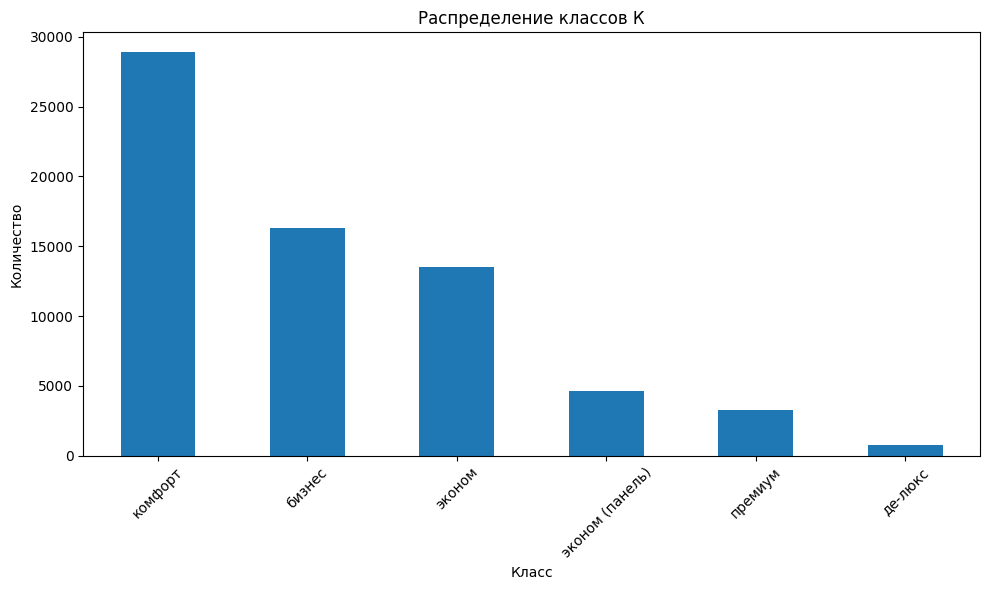

In [ ]:
# 1. Подсчет частот категорий
class_counts = final_merged_df['Класс К'].value_counts()

# 2. Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Распределение классов К')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
final_merged_df.to_csv('final_merged_df.csv', index = False)


In [ ]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67378 entries, 0 to 31553
Columns: 229 entries, ID to project_clean_y
dtypes: datetime64[ns](4), float64(16), int64(17), object(192)
memory usage: 118.2+ MB


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
print(final_merged_df.columns)

Index(['ID', 'ID ЖК', 'ЖК рус', 'ЖК англ', 'lat', 'lng', 'Район Город',
       'Регион', 'Метро', 'Станция жд',
       ...
       'Демонстрационные квартиры (шоу-румы)', 'Комплексность строительства',
       'Большинство помещений на первых этажах с выходом на улицу нежилые',
       'Редевелопмент территории (масштабный снос существующих объектов)',
       'Сохранение объектов культурного наследия на территории ЖК',
       'Статус большинства жилых единиц',
       'Средняя этажность в жилом комплексе, этажей',
       'Доля озеленения в территории общего пользования', 'project_clean_x',
       'project_clean_y'],
      dtype='object', length=229)


In [ ]:
#Проверка переменных
print(list(final_merged_df.columns))

['ID', 'ID ЖК', 'ЖК рус', 'ЖК англ', 'lat', 'lng', 'Район Город', 'Регион', 'Метро', 'Станция жд', 'Застройщик ЖК', 'Этажность К мин', 'Этажность К макс', 'Площадь К', 'Квартир в К', '1к кв', '2к кв', '3к кв', '4к кв', 'Тип помещений', 'Стены в К', 'Сдача К', 'Стадия К', 'Старт продаж К', 'Договор К', 'Класс К', 'до МКАД', 'внутри', 'Отделка', 'Зона', 'Метро транспортом', 'Метро пешком', 'Высота потолков', '% расп. корпусов', 'мес. до сдачи', 'срок экспозиции, мес', 'среднемес рост цен', 'ID дом.рф', 'Ключи (д)', 'Дата РВЭ (д)', 'пассажирских лифтов (д)', 'грузовых лифтов (д)', 'квартир на площадке (д)', 'подъездов (д)', 'корпусов в объекте', 'Общая площадь (д)', 'Планируемая стоимость строительства (д)', 'Банк эскроу (д)', 'Банк кредитор (д)', 'project_x', 'year', 'months', 'developer', 'region', 'okrug', 'corpus', 'price', 'sales_live', 'min дата РНС', 'max дата РНВ', 'average_price_growth', 'project_y', 'Уровень транспортной доступности', 'Перспективы изменения уровня транспортной д

In [ ]:
# Создаем копию датафрейма
df_numeric = final_merged_df.copy()

# Преобразуем datetime колонки в timestamp
datetime_columns = df_numeric.select_dtypes(include=['datetime64[ns]']).columns
for col in datetime_columns:
    df_numeric[col] = df_numeric[col].astype(np.int64) // 10**9

# Создаем dummy-переменные для категориальных колонок
categorical_columns = df_numeric.select_dtypes(include=['object']).columns
df_numeric = pd.get_dummies(df_numeric, columns=categorical_columns, dummy_na=True)

# Проверяем результат
print(df_numeric.dtypes.value_counts())

bool       4058
int64        21
float64      16
Name: count, dtype: int64


In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67378 entries, 0 to 31553
Columns: 4095 entries, ID to project_clean_y_nan
dtypes: bool(4058), float64(16), int64(21)
memory usage: 280.3 MB


In [ ]:
df_numeric.to_csv('df_numeric.csv', index=False)